# 01_Exploración de Datos

Este notebook realiza el análisis exploratorio del dataset de calidad de agua para acuicultura.
Se incluirán pasos de carga, limpieza, resumen y visualización de variables.

## 1. Importar librerías

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import math
%matplotlib inline

## 2. Cargar dataset

In [3]:
import os

# Comprueba tu directorio de trabajo actual
print("PWD:", os.getcwd())

# Lista el contenido del directorio raw usando la ruta correcta
print("Archivos en ../data/raw:", os.listdir("../data/raw"))

PWD: c:\fuzzy_calidad_agua\notebooks
Archivos en ../data/raw: ['WQD.csv']


In [7]:
# Ajusta la ruta si es necesario
df = pd.read_csv('../data/raw/WQD.csv', sep=";")

# Limpiar los nombres de las columnas (eliminar espacios al inicio y al final)
df.columns = df.columns.str.strip()

#Ver los primeros 5 registros
df.head()

,Temp,Turbidity (cm),DO(mg/L),BOD (mg/L),CO2,PH,Alkalinity (mg L-1 ),Hardness (mg L-1 ),Calcium (mg L-1 ),Ammonia (mg L-1 ),Nitrite (mg L-1 ),Phosphorus (mg L-1 ),H2S (mg L-1 ),Plankton (No. L-1),Water Quality
0,"67,4487","10,1271","0,2082","7,4736","10,1811","4,7517","218,3649","300,1251","337,1782","0,2861","4,3553","0,0060","0,0668","6.069,6240",2
1,"64,6267","94,0156","11,4345","10,8600","14,8605","3,0852","273,9397","8,4268","363,6607","0,0960","2,1828","0,0049","0,0234","250,9960",2
2,"65,1218","90,6535","12,4309","12,8100","12,3200","9,6485","220,8127","11,7263","309,3709","0,9745","4,9018","0,0070","0,0650","7.218,9275",2
3,"1,6403","0,0663","10,9635","8,5080","12,9552","4,8200","266,5716","6,6277","8,1805","0,8849","3,5718","3,1745","0,0260","1.230,0623",2
4,"64,8634","2,1192","1,3617","13,3354","13,6032","10,2440","252,1080","339,8915","253,9969","0,8017","4,6559","3,8547","0,0610","1.035,0548",2


## 3. Información general y estadística descriptiva

In [10]:
# Información general
df.info()

# Estadísticas descriptivas
df.describe().T


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4300 entries, 0 to 4299
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Temp                  4300 non-null   object
 1   Turbidity (cm)        4300 non-null   object
 2   DO(mg/L)              4300 non-null   object
 3   BOD (mg/L)            4300 non-null   object
 4   CO2                   4300 non-null   object
 5   PH                    4300 non-null   object
 6   Alkalinity (mg L-1 )  4300 non-null   object
 7   Hardness (mg L-1 )    4300 non-null   object
 8   Calcium (mg L-1 )     4300 non-null   object
 9   Ammonia (mg L-1 )     4300 non-null   object
 10  Nitrite (mg L-1 )     4300 non-null   object
 11  Phosphorus (mg L-1 )  4300 non-null   object
 12  H2S (mg L-1 )         4300 non-null   object
 13  Plankton (No. L-1)    4300 non-null   object
 14  Water Quality         4300 non-null   int64 
dtypes: int64(1), object(14)
memory usage: 

,count,mean,std,min,25%,50%,75%,max
Water Quality,4300.0,1.023256,0.820996,0.0,0.0,1.0,2.0,2.0


## 4. Conversión de columnas object a tipo numérico

In [11]:
# Excluimos la columna de etiqueta 'Water Quality'
cols = [c for c in df.columns if c != 'Water Quality']

for col in cols:
    # Reemplaza coma por punto, elimina espacios y convierte a numérico
    df[col] = pd.to_numeric(
        df[col].astype(str).str.replace(',', '.').str.strip(),
        errors='coerce'
    )

# 3. Verificar tipos
print(df.dtypes)

df.head()

Temp                    float64
Turbidity (cm)          float64
DO(mg/L)                float64
BOD (mg/L)              float64
CO2                     float64
PH                      float64
Alkalinity (mg L-1 )    float64
Hardness (mg L-1 )      float64
Calcium (mg L-1 )       float64
Ammonia (mg L-1 )       float64
Nitrite (mg L-1 )       float64
Phosphorus (mg L-1 )    float64
H2S (mg L-1 )           float64
Plankton (No. L-1)      float64
Water Quality             int64
dtype: object


,Temp,Turbidity (cm),DO(mg/L),BOD (mg/L),CO2,PH,Alkalinity (mg L-1 ),Hardness (mg L-1 ),Calcium (mg L-1 ),Ammonia (mg L-1 ),Nitrite (mg L-1 ),Phosphorus (mg L-1 ),H2S (mg L-1 ),Plankton (No. L-1),Water Quality
0,67.4487,10.1271,0.2082,7.4736,10.1811,4.7517,218.3649,300.1251,337.1782,0.2861,4.3553,0.0060,0.0668,NaN,2
1,64.6267,94.0156,11.4345,10.8600,14.8605,3.0852,273.9397,8.4268,363.6607,0.0960,2.1828,0.0049,0.0234,250.996,2
2,65.1218,90.6535,12.4309,12.8100,12.3200,9.6485,220.8127,11.7263,309.3709,0.9745,4.9018,0.0070,0.0650,NaN,2
3,1.6403,0.0663,10.9635,8.5080,12.9552,4.8200,266.5716,6.6277,8.1805,0.8849,3.5718,3.1745,0.0260,NaN,2
4,64.8634,2.1192,1.3617,13.3354,13.6032,10.2440,252.1080,339.8915,253.9969,0.8017,4.6559,3.8547,0.0610,NaN,2


In [12]:
# Estadísticas descriptivas
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Temp,4300.0,25.695664,9.670202,0.194000,19.775925,25.04185,30.277700,84.2515
Turbidity (cm),4300.0,39.046682,20.942726,0.051400,22.224100,30.20570,55.945725,99.7977
DO(mg/L),4300.0,5.300346,1.832735,0.133900,3.978375,5.00075,6.521200,14.9701
BOD (mg/L),4300.0,3.125079,2.292061,1.000600,1.522075,2.23600,4.324600,14.9430
CO2,4300.0,6.375930,2.831104,0.001200,5.048800,6.59810,8.241500,14.9842
PH,4300.0,7.713468,1.580282,0.003900,6.443000,7.74315,9.035250,14.8512
Alkalinity (mg L-1 ),4300.0,93.717183,68.949048,25.012300,40.422400,67.56260,132.834400,299.9132
Hardness (mg L-1 ),4300.0,127.055477,78.883090,0.255800,69.479650,111.06330,162.675625,398.7966
Calcium (mg L-1 ),4300.0,84.871932,75.718841,0.018300,23.745100,62.84545,115.596800,399.3214
Ammonia (mg L-1 ),4300.0,0.048269,0.122886,0.000001,0.012700,0.02630,0.039000,0.9993


## 5. Distribución de variables

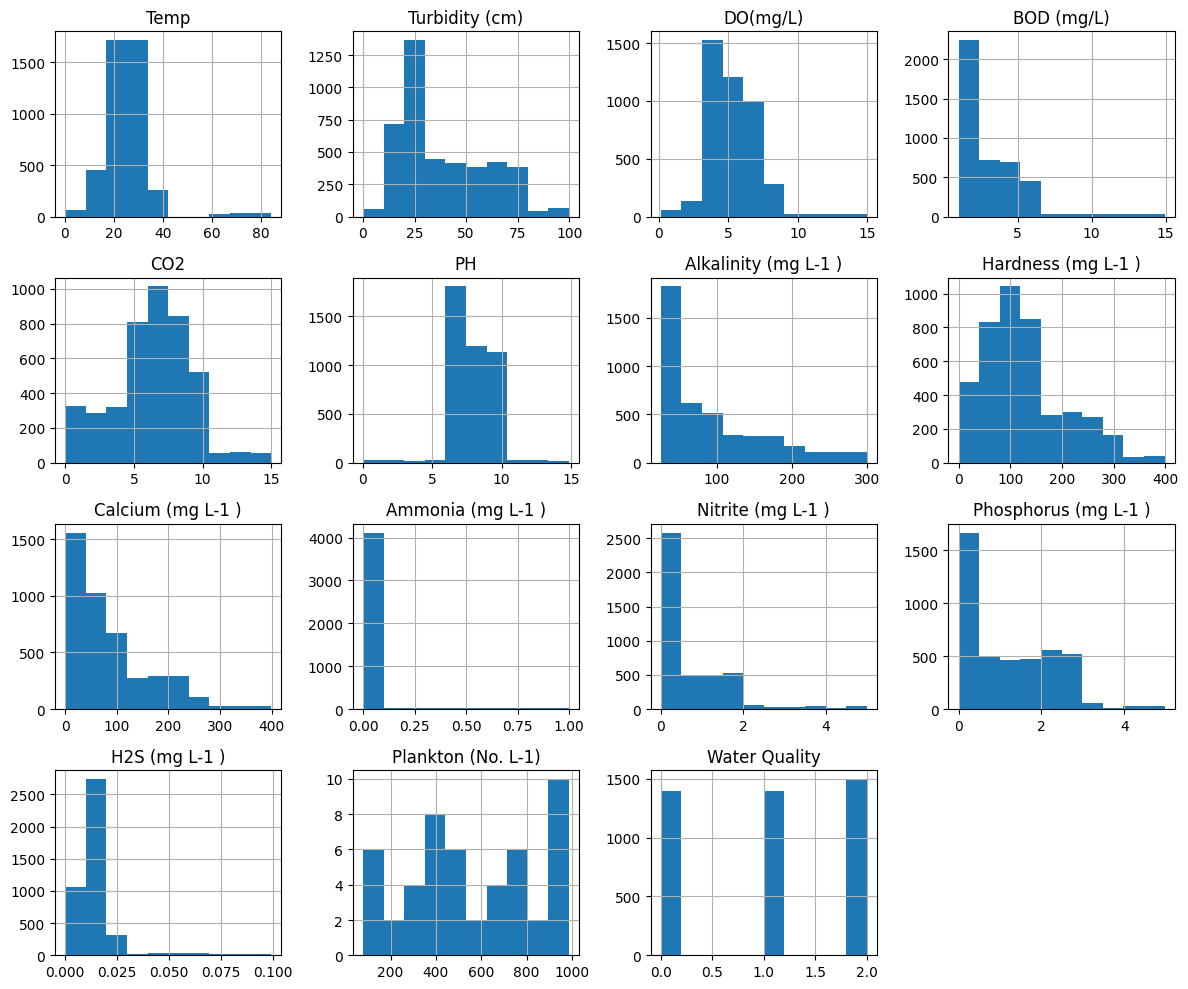

In [15]:
# Histogramas de las variables cuantitativas
df.hist(figsize=(12, 10))
plt.tight_layout()

## 6. Distribución de clases de calidad

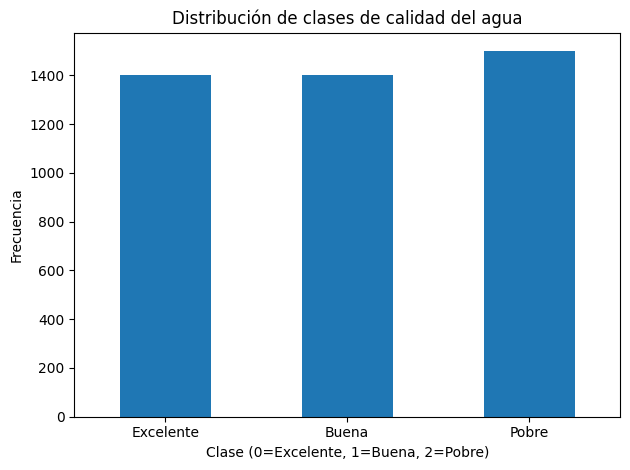

In [14]:
# Asegurarnos de que la etiqueta sea numérica
df['Water Quality'] = pd.to_numeric(df['Water Quality'], errors='coerce')

# Contar y ordenar por clase
class_counts = df['Water Quality'].value_counts().sort_index()

# Graficar
import matplotlib.pyplot as plt

class_counts.plot(kind='bar')
plt.title('Distribución de clases de calidad del agua')
plt.xlabel('Clase (0=Excelente, 1=Buena, 2=Pobre)')
plt.ylabel('Frecuencia')
plt.xticks([0, 1, 2], ['Excelente', 'Buena', 'Pobre'], rotation=0)
plt.tight_layout()
plt.show()


## 7. Verificación de valores nulos y outlier

In [16]:
#  Verificar valores nulos
null_counts = df.isnull().sum()
null_percents = df.isnull().mean() * 100

print("Valores nulos por columna:")
print(null_counts)
print("\nPorcentaje de valores nulos por columna:")
print(null_percents)

Valores nulos por columna:
Temp                       0
Turbidity (cm)             0
DO(mg/L)                   0
BOD (mg/L)                 0
CO2                        0
PH                         0
Alkalinity (mg L-1 )       0
Hardness (mg L-1 )         0
Calcium (mg L-1 )          0
Ammonia (mg L-1 )          0
Nitrite (mg L-1 )          0
Phosphorus (mg L-1 )       0
H2S (mg L-1 )              0
Plankton (No. L-1)      4250
Water Quality              0
dtype: int64

Porcentaje de valores nulos por columna:
Temp                     0.000000
Turbidity (cm)           0.000000
DO(mg/L)                 0.000000
BOD (mg/L)               0.000000
CO2                      0.000000
PH                       0.000000
Alkalinity (mg L-1 )     0.000000
Hardness (mg L-1 )       0.000000
Calcium (mg L-1 )        0.000000
Ammonia (mg L-1 )        0.000000
Nitrite (mg L-1 )        0.000000
Phosphorus (mg L-1 )     0.000000
H2S (mg L-1 )            0.000000
Plankton (No. L-1)      98.837209
Water Q

### Tratamiento de valores nulos

In [17]:
#Tratamos los valores nulos
# Eliminar la columna “Plankton” del DataFrame
df = df.drop(columns=['Plankton (No. L-1)'])

# Verificar que ya no exista
print(df.columns)

# Actualizar la lista de variables numéricas (sin etiqueta ni plankton)
feature_cols = [c for c in df.columns if c != 'Water Quality']
print("Variables de entrada:", feature_cols)


Index(['Temp', 'Turbidity (cm)', 'DO(mg/L)', 'BOD (mg/L)', 'CO2', 'PH',
       'Alkalinity (mg L-1 )', 'Hardness (mg L-1 )', 'Calcium (mg L-1 )',
       'Ammonia (mg L-1 )', 'Nitrite (mg L-1 )', 'Phosphorus (mg L-1 )',
       'H2S (mg L-1 )', 'Water Quality'],
      dtype='object')
Variables de entrada: ['Temp', 'Turbidity (cm)', 'DO(mg/L)', 'BOD (mg/L)', 'CO2', 'PH', 'Alkalinity (mg L-1 )', 'Hardness (mg L-1 )', 'Calcium (mg L-1 )', 'Ammonia (mg L-1 )', 'Nitrite (mg L-1 )', 'Phosphorus (mg L-1 )', 'H2S (mg L-1 )']


### Detección de outliers con método IQR

In [18]:
# Excluimos la columna de etiqueta 'Water Quality'
cols = [c for c in df.columns if c != 'Water Quality']

outlier_summary = []

for col in cols:
    # Calculamos cuartiles e IQR
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filtramos outliers
    mask = (df[col] < lower_bound) | (df[col] > upper_bound)
    n_outliers = mask.sum()
    pct_outliers = 100 * n_outliers / len(df)

    outlier_summary.append({
        "variable": col,
        "Q1": Q1,
        "Q3": Q3,
        "IQR": IQR,
        "lower_bound": lower_bound,
        "upper_bound": upper_bound,
        "n_outliers": n_outliers,
        "pct_outliers": pct_outliers
    })

outliers_df = pd.DataFrame(outlier_summary)
print("\nResumen de outliers por variable:")
print(outliers_df)


Resumen de outliers por variable:
                variable         Q1          Q3        IQR  lower_bound  \
0                   Temp  19.775925   30.277700  10.501775     4.023263   
1         Turbidity (cm)  22.224100   55.945725  33.721625   -28.358337   
2               DO(mg/L)   3.978375    6.521200   2.542825     0.164138   
3             BOD (mg/L)   1.522075    4.324600   2.802525    -2.681713   
4                    CO2   5.048800    8.241500   3.192700     0.259750   
5                     PH   6.443000    9.035250   2.592250     2.554625   
6   Alkalinity (mg L-1 )  40.422400  132.834400  92.412000   -98.195600   
7     Hardness (mg L-1 )  69.479650  162.675625  93.195975   -70.314313   
8      Calcium (mg L-1 )  23.745100  115.596800  91.851700  -114.032450   
9      Ammonia (mg L-1 )   0.012700    0.039000   0.026300    -0.026750   
10     Nitrite (mg L-1 )   0.010600    1.166750   1.156150    -1.723625   
11  Phosphorus (mg L-1 )   0.028375    2.101325   2.072950    -3.

Dado que ninguna variable presenta más del 5 % de outliers de forma individual, podríamos eliminarlos sin perder demasiada información. Sin embargo, si aplicamos un filtro que descarta filas con outliers en cualquiera de las variables, el porcentaje total de filas perdidas podría superar con creces el 5 %.

Por eso, para este proyecto neuro-difuso (ANFIS) donde queremos aprovechar al máximo cada muestra y evitar “saltos” abruptos en las funciones de pertenencia, la mejor opción es aplicar winsorization (capping) de los valores fuera de los límites IQR, llevándolos al valor mínimo o máximo permitido. De este modo:

- Conservamos todo el dataset para entrenamiento y validación.
- Limitamos el efecto de valores extremos en la definición de las MFs.
- Mantenemos la continuidad requerida por los ajustes neuronales internos de ANFIS.

### Tratamiento de outliers con winsorización

In [19]:
# Creamos una copia para no alterar df original
df_wins = df.copy()

for col in feature_cols:
    Q1 = df_wins[col].quantile(0.25)
    Q3 = df_wins[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    # Clipea los valores fuera de [lower, upper]
    df_wins[col] = df_wins[col].clip(lower=lower, upper=upper)

# Verificamos que ya no hay valores fuera de rango
outlier_counts_post = {}
for col in feature_cols:
    mask = (df_wins[col] < df_wins[col].quantile(0.25) - 1.5*(df_wins[col].quantile(0.75)-df_wins[col].quantile(0.25))) | \
           (df_wins[col] > df_wins[col].quantile(0.75) + 1.5*(df_wins[col].quantile(0.75)-df_wins[col].quantile(0.25)))
    outlier_counts_post[col] = mask.sum()

print("Outliers restantes tras winsorize:", outlier_counts_post)


Outliers restantes tras winsorize: {'Temp': 0, 'Turbidity (cm)': 0, 'DO(mg/L)': 0, 'BOD (mg/L)': 0, 'CO2': 0, 'PH': 0, 'Alkalinity (mg L-1 )': 0, 'Hardness (mg L-1 )': 0, 'Calcium (mg L-1 )': 0, 'Ammonia (mg L-1 )': 0, 'Nitrite (mg L-1 )': 0, 'Phosphorus (mg L-1 )': 0, 'H2S (mg L-1 )': 0}


### Visualización de variables winsorizadas

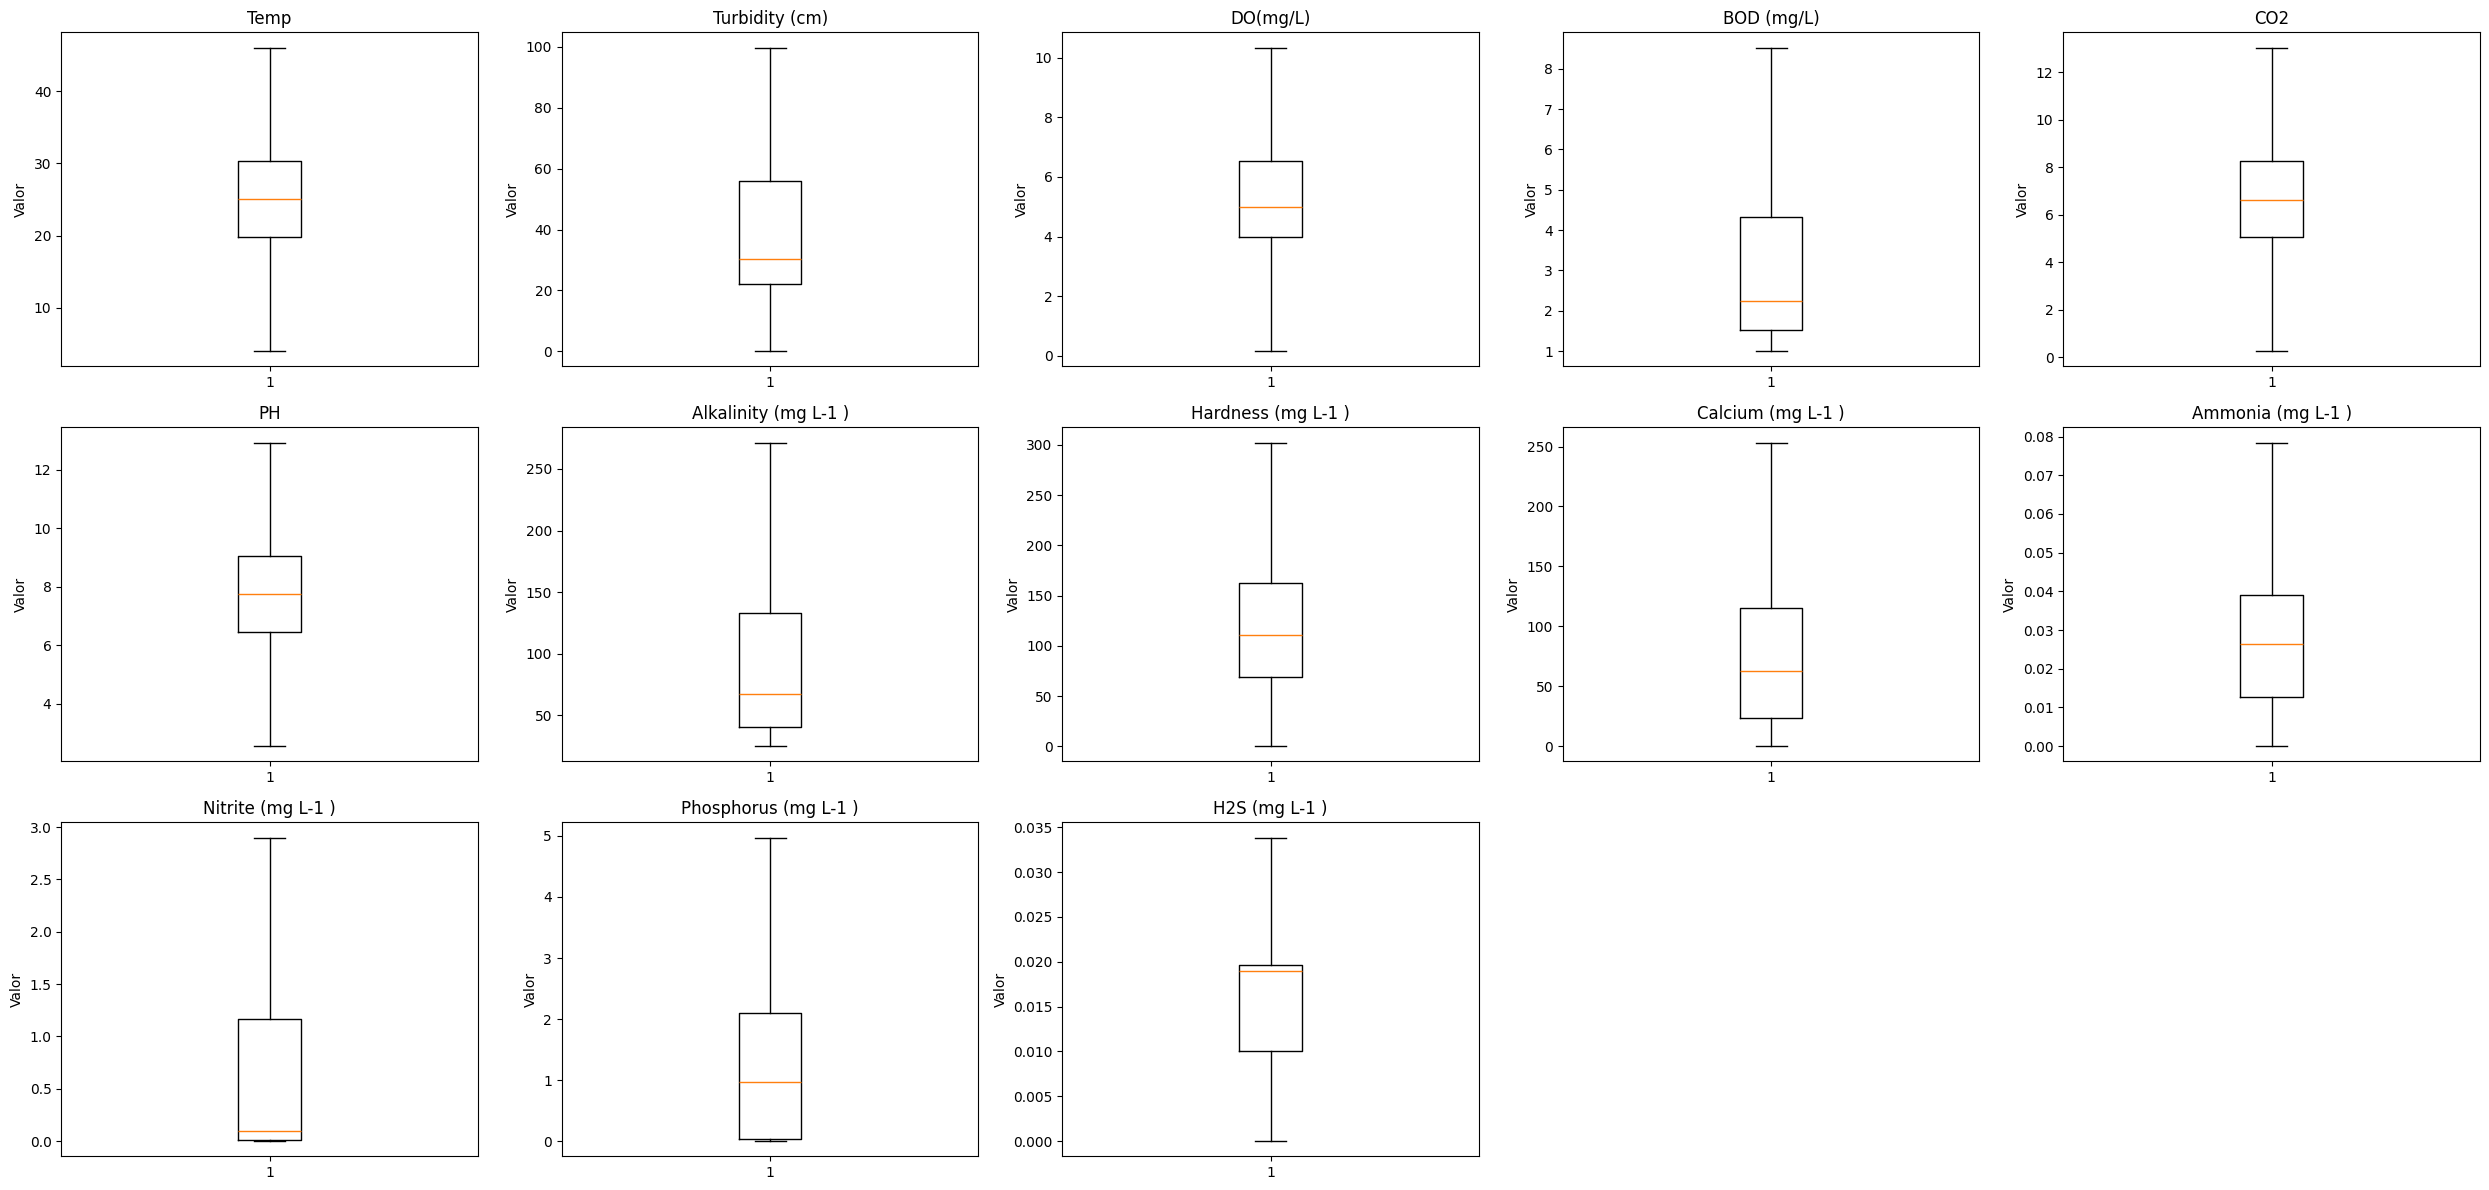

In [20]:
# Definir número de columnas y filas para subplots
n_vars = len(feature_cols)
ncols = 5
nrows = math.ceil(n_vars / ncols)

# Crear figura y ejes
fig, axes = plt.subplots(nrows, ncols, figsize=(5*ncols, 4*nrows))

# Plot boxplot para cada variable
for idx, var in enumerate(feature_cols):
    row = idx // ncols
    col = idx % ncols
    ax = axes[row, col] if nrows > 1 else axes[col]
    ax.boxplot(df_wins[var].dropna())
    ax.set_title(var)
    ax.set_ylabel('Valor')

# Eliminar ejes vacíos
for j in range(n_vars, nrows*ncols):
    fig.delaxes(axes.flatten()[j])

plt.tight_layout()
plt.show()

De los boxplots de las variables winsorizadas podemos extraer varias conclusiones importantes antes de diseñar nuestras funciones de pertenencia y pasar al entrenamiento:

### Eliminación de valores extremos
– Al “capar” con los límites IQR, ningún valor se sitúa ya fuera de los bigotes de cada caja.
– Se conservan todos los datos, pero los picos extremos han quedado controlados.

### Medianas y dispersión
– Temp: mediana cerca de 26 °C, rango intercuartílico (IQR) de ≈ 10 °C, con bigotes que abarcan desde ~4°C hasta ~46°C.
– Turbidity: muy asimétrica a derecha; mediana ~30 NTU, IQR ≈ 33 NTU.
– DO(mg/L): distribución relativamente simétrica en torno a 5 mg/L, IQR ≈ 2.5 mg/L.
– BOD (mg/L) y Phosphorus presentan colas largas a derecha: concentración de algunos valores por encima de 8 mg/L y 4 mg/L respectivamente antes de capar.
– Alcalinidad, Hardness, Calcium: rangos muy amplios (IQR > 90 mg/L), indicativo de alta variabilidad natural o de mediciones en condiciones muy dispares.
– Ammonia y H2S: muy baja concentración en general (IQR < 0.03 mg/L), escala distinta a las demás variables.

### Sesgo de las distribuciones
– Turbidez, Hardness y Calcium están sesgadas a valores altos (colas derechas).
– DO y pH son las más cercanas a una distribución centrada.

### Implicaciones para el diseño Fuzzy/ANFIS
– Podremos definir funciones de pertenencia con tres niveles (“Bajo”, “Medio”, “Alto”) usando los cuartiles (Q1, Q2, Q3) como puntos de cambio.
– Para variables con alta dispersión (como Calcium), quizá convenga usar MFs trapezoidales más anchas.
– Para variables de baja variabilidad (Ammonia, H2S), MFs triangulares con rangos estrechos para captar pequeños cambios.

### Estadística descritriptiva de los datos winsorizados

,count,mean,std,min,25%,50%,75%,max
Temp,4300.0,25.098353,7.057976,4.023263,19.775925,25.04185,30.277700,46.030362
Turbidity (cm),4300.0,39.046682,20.942726,0.051400,22.224100,30.20570,55.945725,99.797700
DO(mg/L),4300.0,5.261358,1.685712,0.164138,3.978375,5.00075,6.521200,10.335438
BOD (mg/L),4300.0,3.011778,1.875629,1.000600,1.522075,2.23600,4.324600,8.528388
CO2,4300.0,6.361283,2.783454,0.259750,5.048800,6.59810,8.241500,13.030550
PH,4300.0,7.723181,1.488215,2.554625,6.443000,7.74315,9.035250,12.923625
Alkalinity (mg L-1 ),4300.0,93.348120,67.940924,25.012300,40.422400,67.56260,132.834400,271.452400
Hardness (mg L-1 ),4300.0,125.960684,75.918496,0.255800,69.479650,111.06330,162.675625,302.469587
Calcium (mg L-1 ),4300.0,83.181633,70.633700,0.018300,23.745100,62.84545,115.596800,253.374350
Ammonia (mg L-1 ),4300.0,0.027399,0.017999,0.000001,0.012700,0.02630,0.039000,0.078450


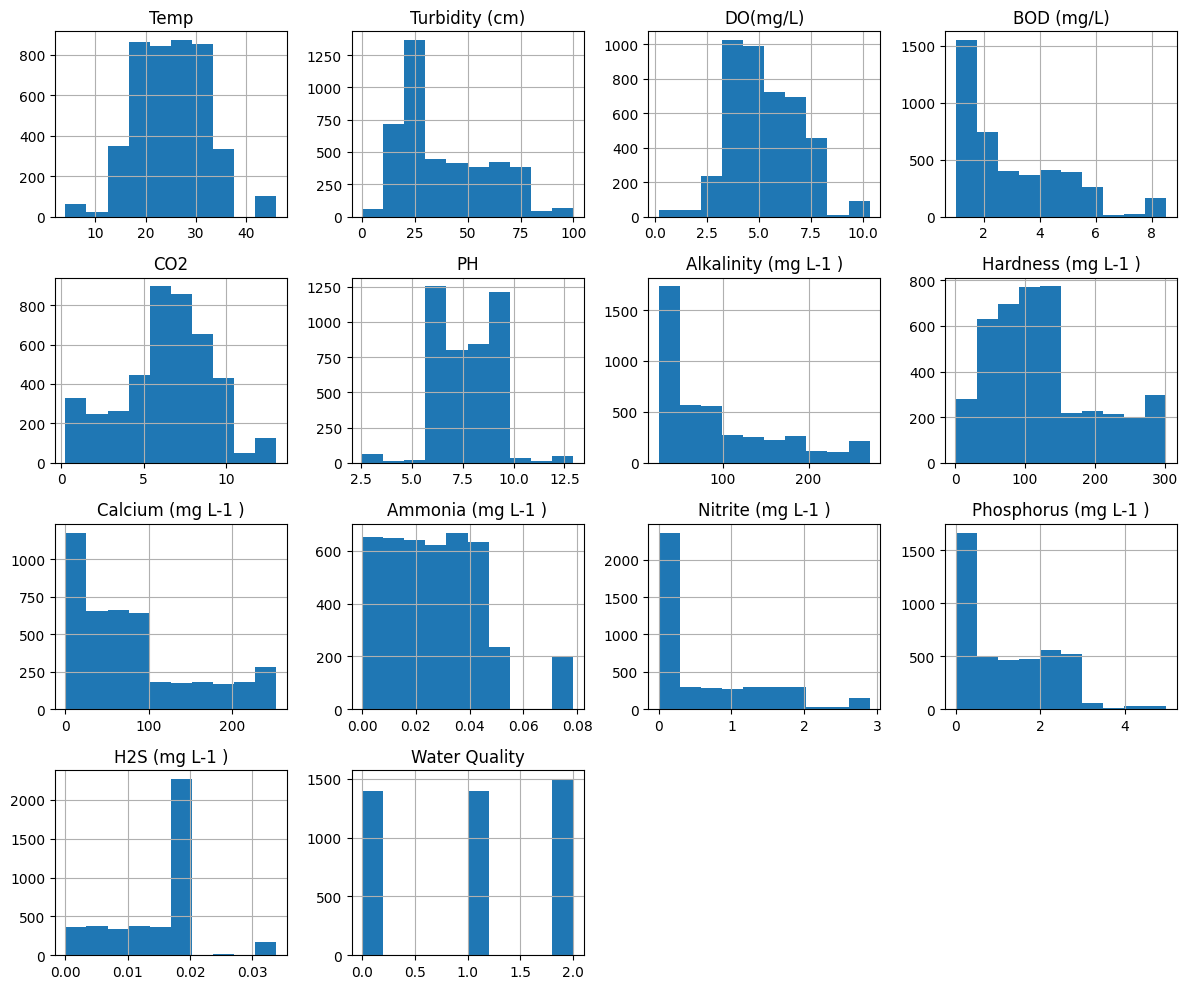

In [25]:
# Histogramas de las variables cuantitativas
df_wins.hist(figsize=(12, 10))
plt.tight_layout()

# Estadísticas descriptivas
df_wins.describe().T

### Distribución de clases de datos winsorizados

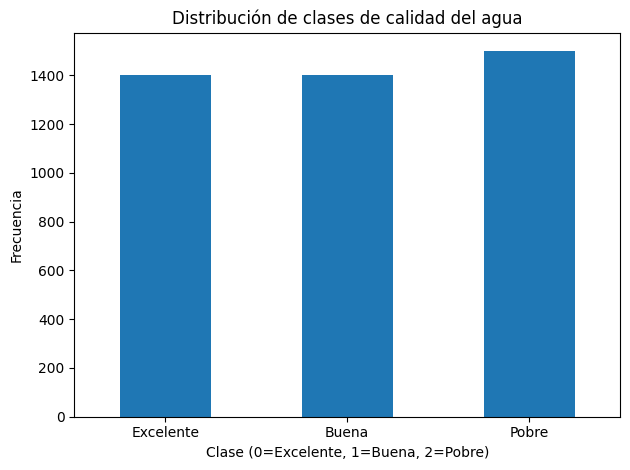

In [26]:
# Contar y ordenar por clase
class_counts = df_wins['Water Quality'].value_counts().sort_index()


class_counts.plot(kind='bar')
plt.title('Distribución de clases de calidad del agua')
plt.xlabel('Clase (0=Excelente, 1=Buena, 2=Pobre)')
plt.ylabel('Frecuencia')
plt.xticks([0, 1, 2], ['Excelente', 'Buena', 'Pobre'], rotation=0)
plt.tight_layout()
plt.show()

### 8. Matriz de correlación de datos Winsorizados para multicoloneidad

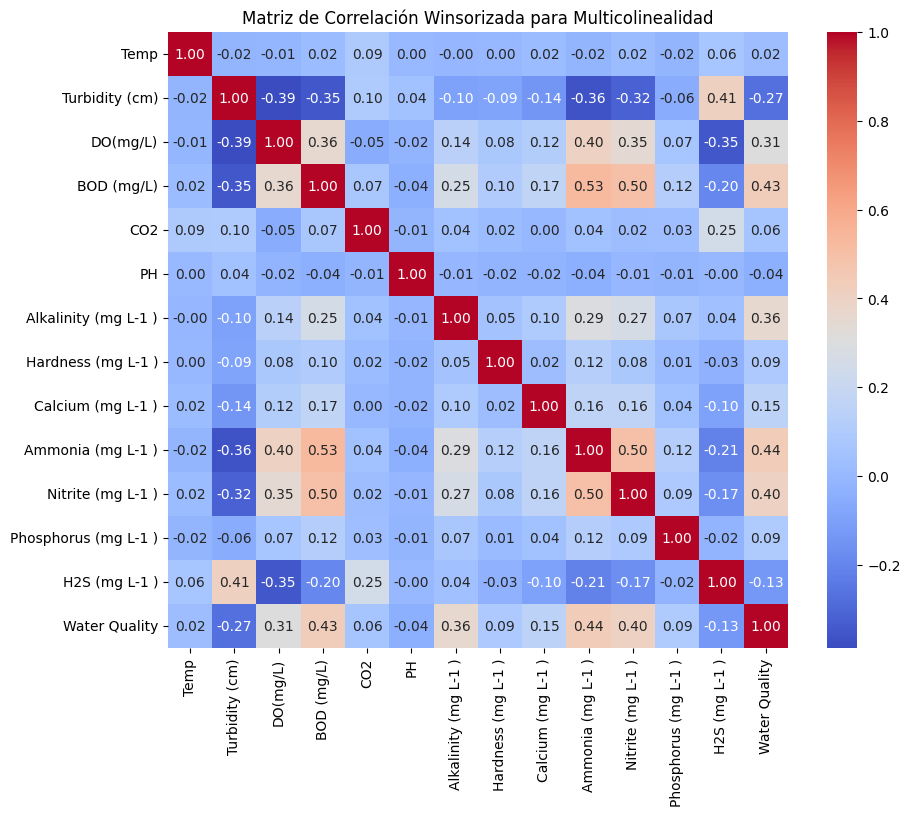

VIF para cada variable:
                Variable        VIF
0                   Temp  11.789989
1         Turbidity (cm)   5.853738
2               DO(mg/L)  12.090724
3             BOD (mg/L)   5.819884
4                    CO2   6.690882
5                     PH  17.799601
6   Alkalinity (mg L-1 )   3.307692
7     Hardness (mg L-1 )   3.709273
8      Calcium (mg L-1 )   2.468950
9      Ammonia (mg L-1 )   5.628911
10     Nitrite (mg L-1 )   2.458590
11  Phosphorus (mg L-1 )   2.196541
12         H2S (mg L-1 )   7.034012


In [23]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calcular la matriz de correlación para analizar multicolinealidad
corr_matrix = df_wins.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Matriz de Correlación Winsorizada para Multicolinealidad')
plt.show()

# Calcular el Factor de Inflación de la Varianza (VIF) para cada variable
# Excluimos la variable 'Water Quality'
X = df_wins.drop(columns=['Water Quality'])
vif_data = pd.DataFrame({
    'Variable': X.columns,
    'VIF': [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
})

print("VIF para cada variable:")
print(vif_data)

### 9. Guardamos el dataframe winsorizado

In [67]:
# Crea la carpeta si no existe
os.makedirs('../data/processed', exist_ok=True)

# Guarda df_wins en formato CSV (usa ';' si quieres consistencia con el raw)
df_wins.to_csv('../data/processed/winsorized_water_quality.csv', index=False, sep=';')

# Ver dataframe winsorizado
df_wins.head()

# Ver las variables del dataframe winsorizado
# df_wins.describe()

,Temp,Turbidity (cm),DO(mg/L),BOD (mg/L),CO2,PH,Alkalinity (mg L-1 ),Hardness (mg L-1 ),Calcium (mg L-1 ),Ammonia (mg L-1 ),Nitrite (mg L-1 ),Phosphorus (mg L-1 ),H2S (mg L-1 ),Water Quality
0,46.030362,10.1271,0.208200,7.473600,10.18110,4.7517,218.3649,300.125100,253.37435,0.07845,2.900975,0.0060,0.03385,2
1,46.030362,94.0156,10.335438,8.528388,13.03055,3.0852,271.4524,8.426800,253.37435,0.07845,2.182800,0.0049,0.02340,2
2,46.030362,90.6535,10.335438,8.528388,12.32000,9.6485,220.8127,11.726300,253.37435,0.07845,2.900975,0.0070,0.03385,2
3,4.023263,0.0663,10.335438,8.508000,12.95520,4.8200,266.5716,6.627700,8.18050,0.07845,2.900975,3.1745,0.02600,2
4,46.030362,2.1192,1.361700,8.528388,13.03055,10.2440,252.1080,302.469587,253.37435,0.07845,2.900975,3.8547,0.03385,2
